In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import PIL

In [26]:
def imshow(a):
  a = a.clip(0, 255).astype('uint8')
  if a.ndim == 3:
    if a.shape[2] == 4:
      a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
    else:
      a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
  display(PIL.Image.fromarray(a))

In [77]:
def imshow_pixel(p):
    imshow(np.full((64, 64, 3), p))

In [52]:
DATA_DIR = 'cathedral'
imgs = []
imgs_gray = []
for img_path in Path(DATA_DIR).iterdir(): 
    imgs.append(cv2.imread(str(img_path)))
    imgs_gray.append(cv2.imread(str(img_path), 0))

imgs = np.array(imgs)
imgs_gray = np.array(imgs_gray)

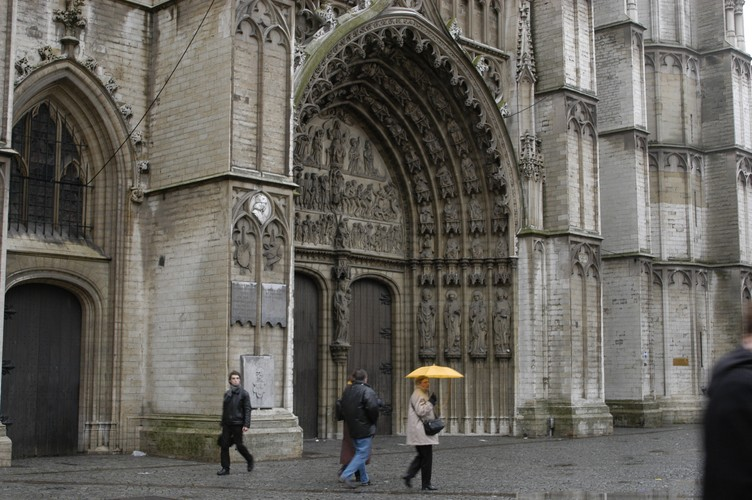

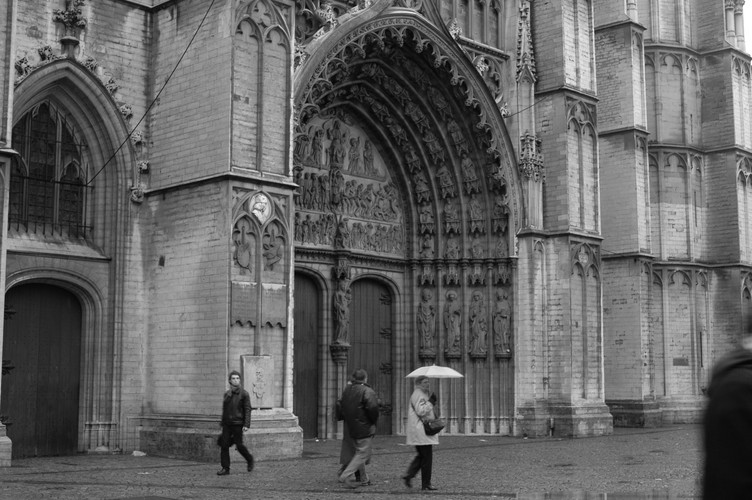

In [53]:
imshow(imgs[0])
imshow(imgs_gray[0])

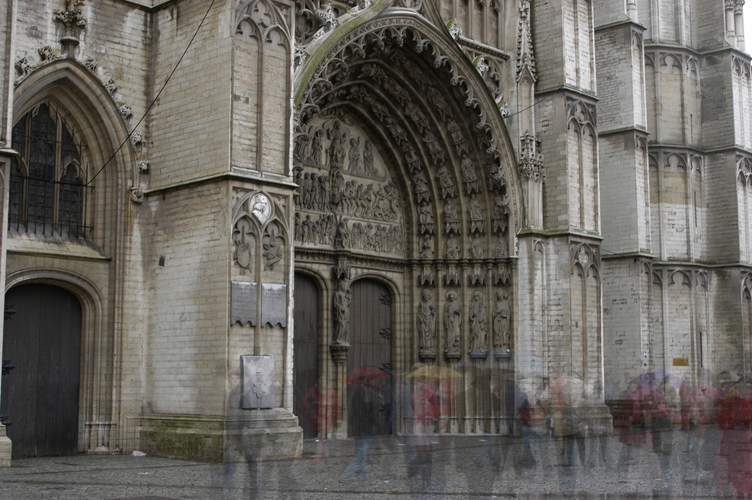

In [54]:
result = np.average(imgs, axis=0)
imshow(result)

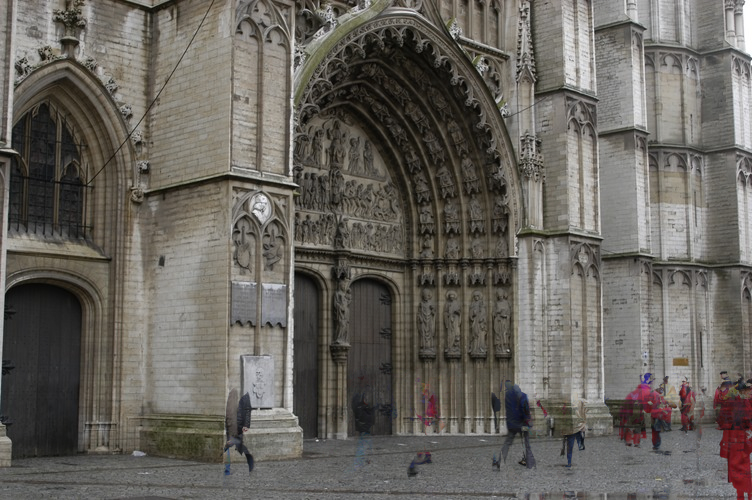

In [55]:
result = np.median(imgs, axis=0)
imshow(result)

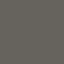

In [78]:
avg_color = np.average(imgs.reshape(-1, 3), axis=0)
imshow_pixel(avg_color)

In [67]:
def combine_images(imgs, avg_color):
    # Reshape the images to a 2D array where each row represents a pixel and its RGB values
    reshaped_imgs = np.reshape(imgs, (imgs.shape[0], -1, 3))
    
    # Calculate the Euclidean distance between each pixel in the images and avg_color
    distances = np.linalg.norm(reshaped_imgs - avg_color[:, None, None], axis=3)
    
    # Find the index of the pixel with the smallest distance for each pixel location
    closest_pixels_index = np.argmin(distances, axis=0)
    
    # Use the indices to select the closest pixel from each image
    combined_image = imgs[closest_pixels_index, np.arange(imgs.shape[1])[:, None], np.arange(imgs.shape[2])[None, :]]
    
    return combined_image

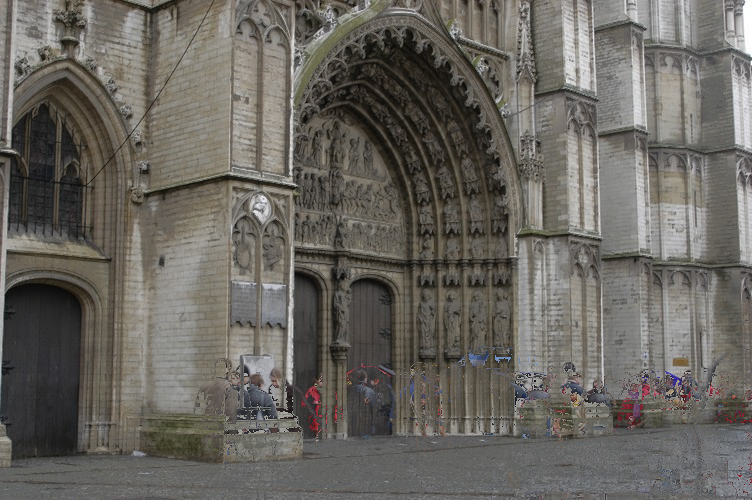

In [120]:
result = np.zeros_like(imgs[0])
for i in range(imgs.shape[1]):
    for j in range(imgs.shape[2]):
        k = np.argmin(np.linalg.norm(imgs[:,i,j] - avg_color, axis=1))
        result[i][j] = imgs[k][i][j]

imshow(result)

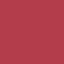

In [121]:
imshow_pixel(result[415,319])

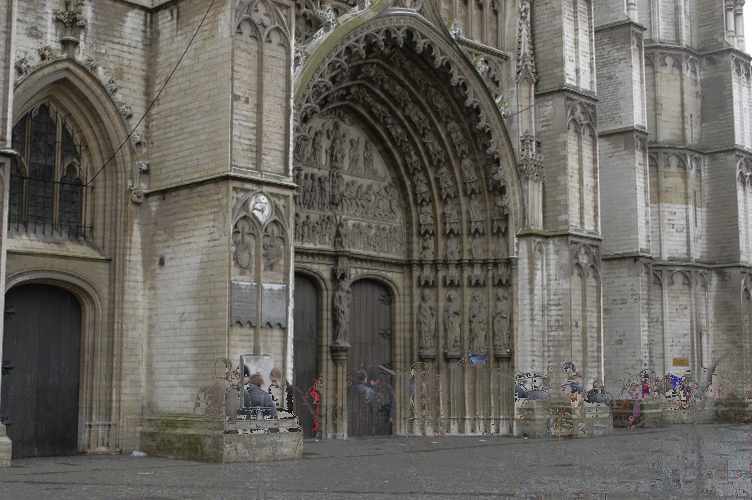

In [122]:

result = np.zeros_like(imgs[0])
for i in range(imgs.shape[1]):
    for j in range(imgs.shape[2]):
        k = np.argmin(np.max(np.abs(imgs[:,i,j] - avg_color), axis=1))
        result[i][j] = imgs[k][i][j]

imshow(result)

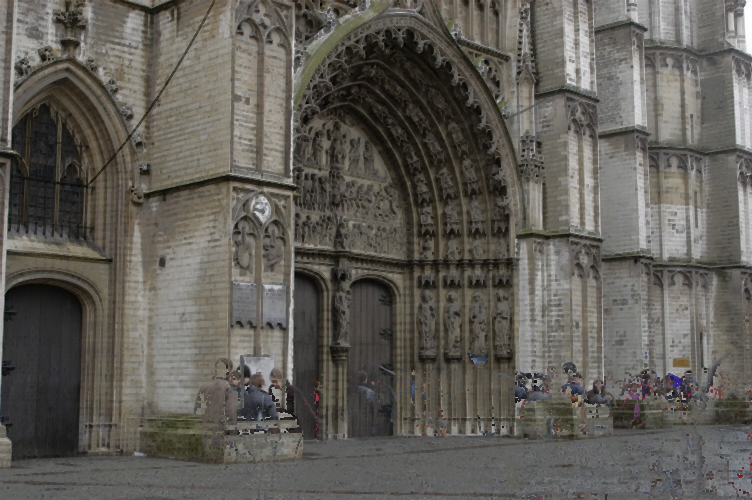

In [132]:
struct = np.ones([2, 2], np.uint8)
imshow(cv2.erode(result, struct, iterations=1))

In [133]:
def Q(img_bin, struct):
  x = cv2.morphologyEx(img_bin, cv2.MORPH_CLOSE, struct)
  x = cv2.morphologyEx(x, cv2.MORPH_OPEN, struct)
  x = cv2.morphologyEx(x, cv2.MORPH_CLOSE, struct)
  return np.minimum(img_bin, x)

def G(img_bin, struct):
  x = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, struct)
  x = cv2.morphologyEx(x, cv2.MORPH_CLOSE, struct)
  x = cv2.morphologyEx(x, cv2.MORPH_OPEN, struct)
  return np.maximum(img_bin, x)

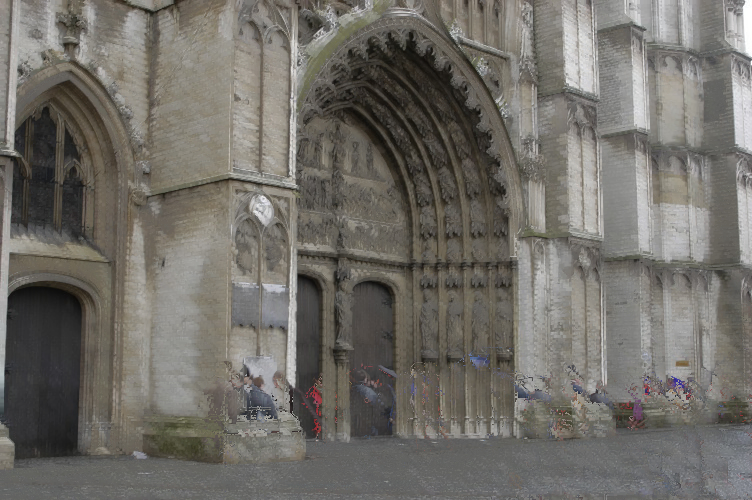

In [135]:
imshow(G(result, struct))